In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

forests_global = pd.read_csv("/home/junglist/Downloads/global forests/share-global-forest.csv")

print(forests_global.head(), forests_global.dtypes, forests_global.shape)


        Entity Code  Year  Share of global forest area
0  Afghanistan  AFG  1990                     0.028525
1  Afghanistan  AFG  1991                     0.028578
2  Afghanistan  AFG  1992                     0.028631
3  Afghanistan  AFG  1993                     0.028684
4  Afghanistan  AFG  1994                     0.028738 Entity                          object
Code                            object
Year                             int64
Share of global forest area    float64
dtype: object (7846, 4)


In [2]:
#grab just continents from the data
forests_continents = forests_global.loc[(forests_global.Entity == "Oceania") | (forests_global.Entity == "Europe")| (forests_global.Entity == "Americas") | (forests_global.Entity == "Africa") | (forests_global.Entity == "South America") | (forests_global.Entity == "Asia")]
forests_continents = forests_continents[forests_continents.Year > 2009]
forests_continents.reset_index(inplace=True)
forests_continents.drop("index", axis=1, inplace=True)
forests_continents.drop("Code", axis=1, inplace=True)
#pivot table to subtract south america from Americas to get the global share of North America
forests_continents = forests_continents.pivot(index="Year", columns="Entity", values="Share of global forest area")
forests_continents["North America"] = forests_continents["Americas"] - forests_continents["South America"]
forests_continents.reset_index(inplace=True)
continents_plot= pd.melt(forests_continents, id_vars=["Year"], value_vars=["South America", "Europe", "North America", "Asia", "Oceania", "Africa"], var_name="continent", value_name="forest share")



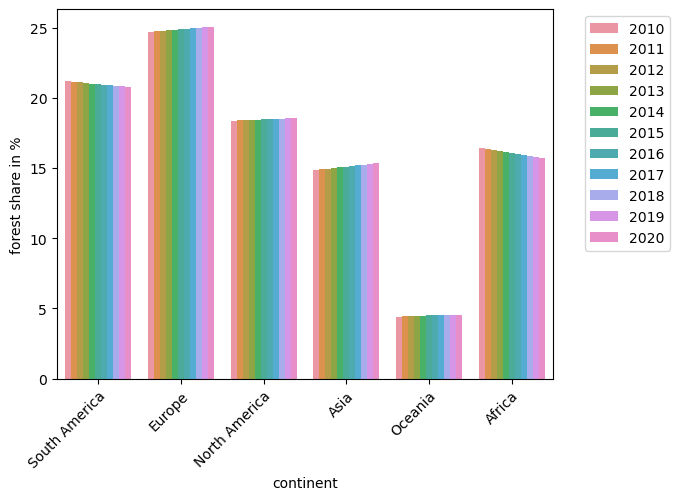

In [37]:
#barplot of all global forest share over the last 10 years
sns.barplot(data=continents_plot, x= "continent", y= "forest share", hue="Year")
plt.legend(bbox_to_anchor = (1.05, 1), loc="upper left")
plt.ylabel("forest share in %")
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()


In [40]:
regrowth = pd.read_csv("/home/junglist/Downloads/global forests/forest-area-primary-planted.csv")
#clean column names and variables
regrowth.rename(columns={"Planted Forest | 00006716 || Area | 005110 || thousand hectares" : "Planted Forest", 'Naturally regenerating forest | 00006717 || Area | 005110 || thousand hectares' : "Naturally regenerating forest"}, inplace=True)
regrowth.Entity = regrowth.Entity.str.replace("FAO", "", regex=True)
regrowth.Entity = regrowth.Entity.str.replace("[()]", "", regex=True)
regrowth.Entity = regrowth.Entity.str.replace(" ", "", regex=True)
regrowth.drop("Code", axis=1, inplace=True)

#grab just continents and years of interest from the data
years = [1990, 1995, 2000, 2005, 2010, 2015, 2019]
continents = ["Oceania", "Asia", "Americas", "Europe", "SouthAmerica", "Africa"]
regrowth_continents = regrowth.query('Entity in @continents')
regrowth_continents = regrowth_continents.query('Year in @years')







array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'SouthAmerica'],
      dtype=object)

In [115]:
#sns.lineplot(data = regrowth_plot, x = "Naturally regenerating forest", y= "Planted Forest", hue="Entity")
#plt.show()
#sns.barplot(data = regrowth_continents, x = "Entity", y= "Naturally regenerating forest", hue="Year")
#plt.show()

NameError: name 'regrowth_plot' is not defined

In [55]:
amer = ["Americas", "SouthAmerica"]
test = regrowth_continents.query('Entity in @amer')
test.reset_index(inplace=True, drop=True)
test.head(15)


,Entity,Year,Planted Forest,Naturally regenerating forest
0,Americas,1990,3.019490e+07,1.698719e+09
1,Americas,1995,3.611095e+07,1.665828e+09
2,Americas,2000,4.202700e+07,1.632936e+09
3,Americas,2005,4.876880e+07,1.600870e+09
4,Americas,2010,5.551060e+07,1.568804e+09
5,Americas,2015,6.206856e+07,1.548939e+09
6,Americas,2019,6.636148e+07,1.532928e+09
7,SouthAmerica,1990,7.045750e+06,9.666205e+08
8,SouthAmerica,1995,8.226010e+06,9.399297e+08
9,SouthAmerica,2000,9.406270e+06,9.132388e+08


In [63]:
df = pd.DataFrame({"country": ["Americas", "Americas","Europe", "Europe", "SouthAmerica", "SouthAmerica", "NorthAmerica", "NorthAmerica"], "year":[2000, 2005, 2000, 2005, 2000, 2005, 2000, 2005], "planted":[900, 800, 300, 100, 500, 300, 400, 500], "regrowth":[300, 400, 500, 200, 200, 100, 100, 300]})

print(df.head(10))

        country  year  planted  regrowth
0      Americas  2000      900       300
1      Americas  2005      800       400
2        Europe  2000      300       500
3        Europe  2005      100       200
4  SouthAmerica  2000      500       200
5  SouthAmerica  2005      300       100
6  NorthAmerica  2000      400       100
7  NorthAmerica  2005      500       300
